In [1]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

import numpy as np
import os
import glob
from imageio import imread, imsave
import cv2

In [2]:
def preprocess(img):
    return (img / 255. - 0.5) * 2

def deprocess(img):
    return (img + 1) / 2

In [3]:
# no_makeup_path = "imgs/no_makeup/original.png"
no_makeup_path = "aligned_images/original.png"

batch_size = 1
img_size = 256
no_makeup = cv2.resize(imread(no_makeup_path), (img_size, img_size))
X_img = np.expand_dims(preprocess(no_makeup), 0)
makeups = glob.glob(os.path.join('imgs', 'makeup', '*.*'))
result = np.ones((2 * img_size, (len(makeups) + 1) * img_size, 3))
result[img_size: 2 *  img_size, :img_size] = no_makeup / 255.

In [4]:
tf.disable_eager_execution()
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [7]:
saver = tf.train.import_meta_graph(os.path.join('beautyGAN/model', 'model.meta'))
saver.restore(sess, tf.train.latest_checkpoint('beautyGAN/model'))

INFO:tensorflow:Restoring parameters from beautyGAN/model/model


In [8]:
graph = tf.get_default_graph()
X = graph.get_tensor_by_name('X:0')
Y = graph.get_tensor_by_name('Y:0')
Xs = graph.get_tensor_by_name('generator/xs:0')

In [34]:
for i in range(len(makeups)):
    makeup = cv2.resize(imread(makeups[i]), (img_size, img_size))
    Y_img = np.expand_dims(preprocess(makeup), 0)
    Xs_ = sess.run(Xs, feed_dict={X: X_img, Y: Y_img})
    Xs_ = deprocess(Xs_)
    result[:img_size, (i + 1) * img_size: (i + 2) * img_size] = makeup / 255.
    result[img_size: 2 * img_size, (i + 1) * img_size: (i + 2) * img_size] = Xs_[0]
    
imsave('result.jpg', result)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[]

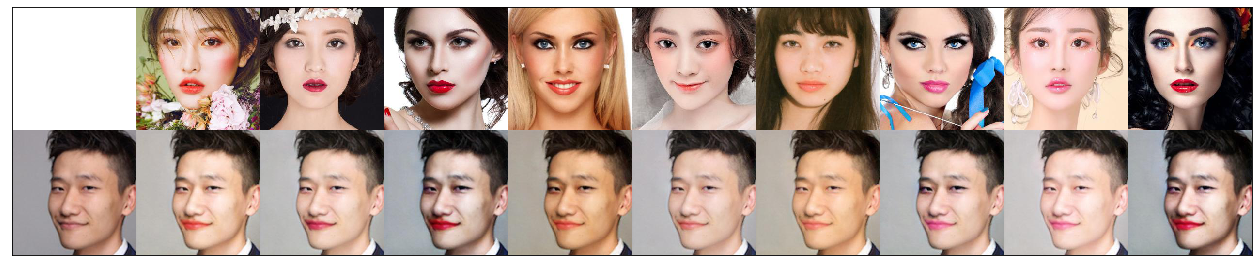

In [36]:
im = plt.imread('result.jpg')
_, ax = plt.subplots(figsize=(20,8), dpi=80)
ax.imshow(im)
ax.set_yticks([])
ax.set_xticks([])

In [10]:
import numpy as np
np.random.choice(["a", "b"], 1)[0]

'a'